In [8]:
import pandas as pd

import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score     #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import KFold
import seaborn as sns
from os import system
from sklearn.tree import export_graphviz 

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Εισαγωγή δεδομένων με χρήση των βιβλιοθηκών Pandas

In [9]:
data = pd.read_csv('C:/Users/athanasis/Desktop/AI-Master/..A..Semester/Machine Learning/Tasks/exer1/day.csv',sep=",")
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


# Διαχωρισμός Δεδομένων σε δεδομενα για το Correlation Matrix και data για train(ndata) και test(labdata)
 - Κάνουμε drop το year,date,registered και casual μιας και δεν μας παρέχουν χρήσημες πληροφορίες για την εκπαίδευση 

In [10]:
ndata = data.drop(['cnt', 'registered','casual','instant','dteday','atemp','yr'], axis=1)
corr_data = data.drop([ 'registered','casual','instant','dteday','yr'], axis=1)
labdata = pd.cut(data['cnt'], bins=10, labels=[0,1,2,3,4,5,6,7,8,9])

# Εμφάνιση δεδομένων Δεδομένων στο Correlation matrix. 
Παρατήρηση:
 - το temp και atemp έχουν 0.99 correlate μεταξύ τους. Κατά την εκπαίδευση κρατάμε μόνο το ένα από τα δυο γιατί δεν υπάρχει κάποια χρησιμότητα για να τα έχουμε και τα δυο.

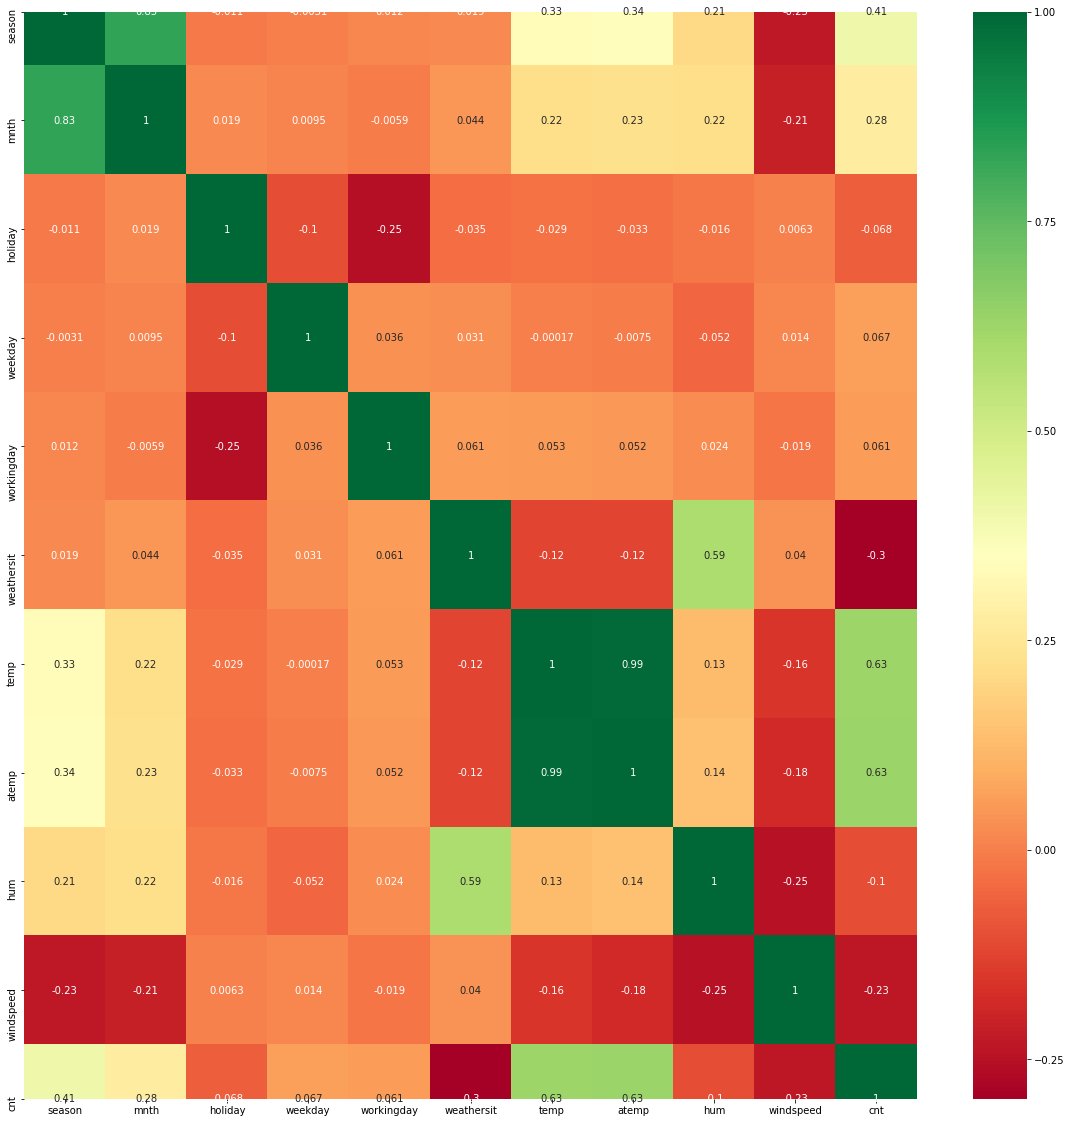

In [11]:
########## get correlation
corrmat = corr_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(corr_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()


# Διαχωρισμος δεδομένων και δοκιμη για το καταλληλο βαθος που πρεπει να εχει το δεντρο.
 Παρατήρηση:
  - Αφού μετρήθηκε το score για  βάθη από 1-30 όπως φαίνεται και στο παρακάτω γράφημα το μοντέλο ξεκινάει να είναι efficient μετά το depth=3. Σαν αποτέλεσμα αυτό να είναι και το βάθος που θα χρησιμοποιηθεί για την τελική χρήση του μοντέλου.

Το Default κρητίριο που έχει το DecisionTreeClassifier είναι το Gini impurity. 
  

0.30454545454545456


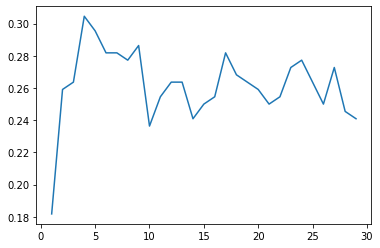

In [12]:
X_train, X_test, y_train, y_test = train_test_split(ndata, labdata, test_size=0.30)

accuracy = []
depth = []
for dep in range(1,30):

        classifier = DecisionTreeClassifier(max_depth=dep)
        classifier.fit(X_train, y_train)
        score = classifier.score(X_test, y_test)
        accuracy.append(score)
        depth.append(dep)

maxAcc = max(accuracy)  
print(maxAcc)
plt.plot(depth,accuracy)
plt.show()

# Εκπέδευση και αξιολόγηση του μοντέλου με βάθος 3 με τα ίδια προκαθορισμένα specs εκπαίδευσης του μοντέλου.

In [13]:
classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))

[[ 0  3  2  0  1  0  0  0  0  0]
 [ 0  8  7  0  1  0  0  0  0  0]
 [ 0  4 14  0  2  6  1  0  0  0]
 [ 0  2  7  0  4  6  3  0  0  0]
 [ 0  0 11  0 12 16  3  0  0  0]
 [ 0  0  6  0  2 20  4  0  0  0]
 [ 0  0  4  0  7  9  1  1  0  0]
 [ 0  0  0  0  0 19  3  3  0  0]
 [ 0  0  0  0  1 21  2  0  0  0]
 [ 0  0  0  0  0  4  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.47      0.50      0.48        16
           2       0.27      0.52      0.36        27
           3       0.00      0.00      0.00        22
           4       0.40      0.29      0.33        42
           5       0.20      0.62      0.30        32
           6       0.06      0.05      0.05        22
           7       0.75      0.12      0.21        25
           8       0.00      0.00      0.00        24
           9       0.00      0.00      0.00         4

    accuracy                           0.26       220
   macro avg       

C:\Users\athanasis\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Εκτύπωση του δέντρου για την ευρεση των δυο most prominent features του dataset. Αποδεικνίετε οτι τα most Prominent είναι τα: Temp, Hum  .

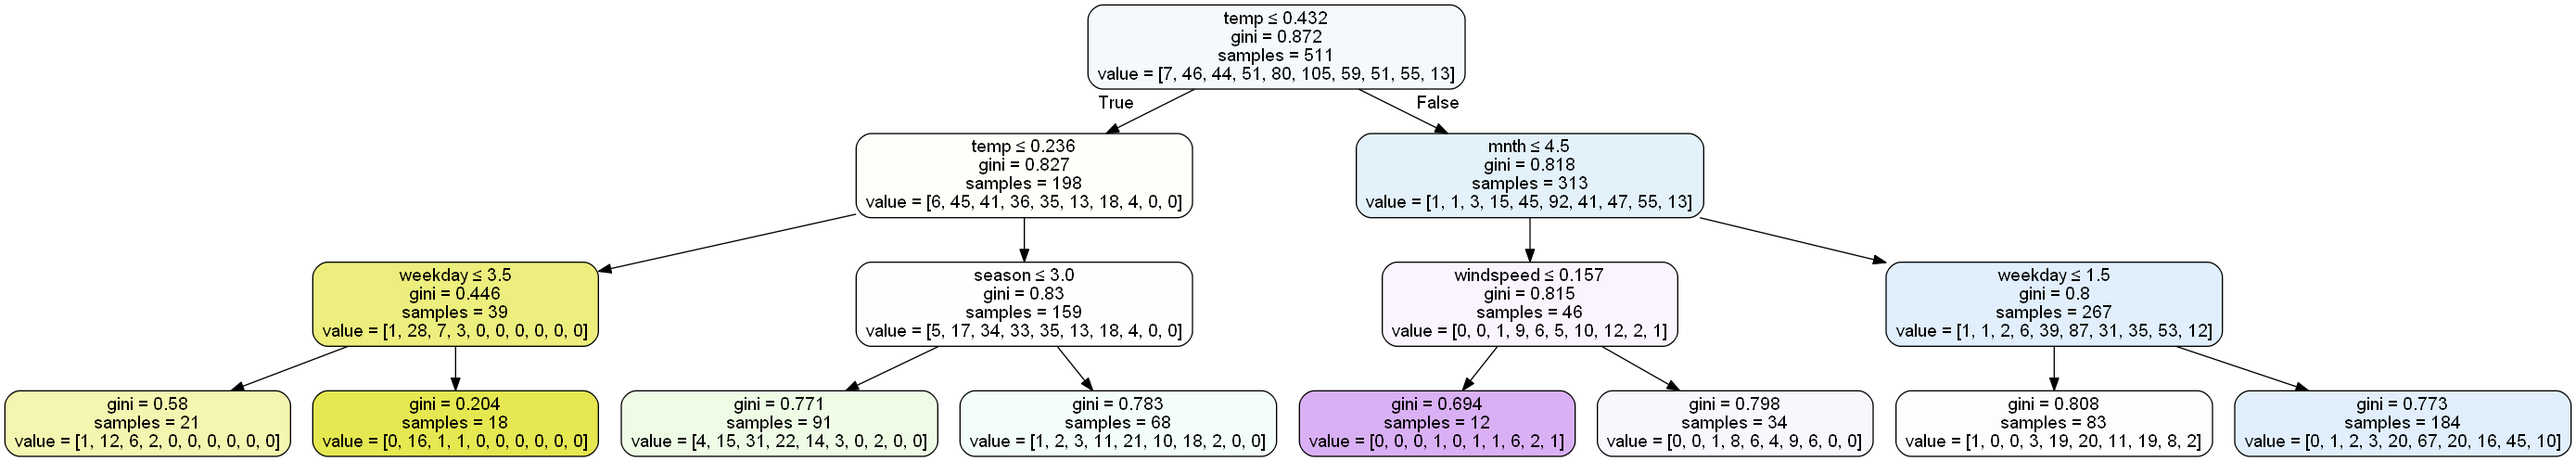

In [14]:
features_names = []
for col in ndata.columns:
    features_names.append(col)
# dotfile = open("tree.dot", 'w')
# export_graphviz(classifier, out_file=dotfile, filled=True, rounded=True,
#                    special_characters=True, feature_names=features_names)
# dotfile.close()
   
# system("dot -Tpng tree.dot -o tree.png")
dot_data = StringIO()

export_graphviz(classifier, out_file=dot_data, filled=True, rounded=True,
                   special_characters=True, feature_names=features_names)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())